4
['AGCAGAAGACTTAATCATGA', 'CTAAGAGAGTAAATATATAC', 'GCGTGAATTCAAGAGACGGG', 'CTTACGTGTCTCTATTATGA', 'ATCACTATTATACCGAGCCC', 'TGATCCAAGTTTCTTGATAG', 'GTGAGTTAACTACGTAGAAC', 'GGAACCACATGTCGGCAGTC', 'CAGCTGTATTCAGACCCAAA', 'GCGGACACCCCGGGGACTGG']
[[ 0.  9.  6. 10.  7.  7.  8.  7.  9.  6.]
 [ 0.  0.  7.  8.  7.  8.  7.  7.  6.  5.]
 [ 0.  0.  0.  7.  6.  8.  9.  8.  7. 11.]
 [ 0.  0.  0.  0.  9.  8.  8.  8.  8.  5.]
 [ 0.  0.  0.  0.  0.  7.  9.  7. 10.  7.]
 [ 0.  0.  0.  0.  0.  0.  9.  9.  8.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  7.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  9.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


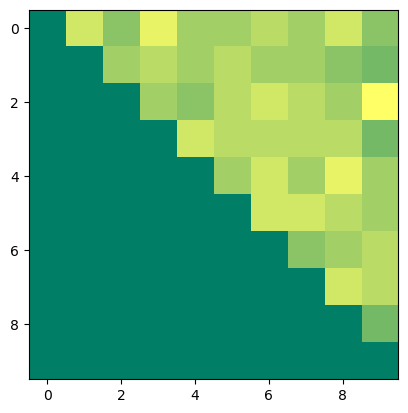

In [28]:
import random 
import math
import numpy as np
import matplotlib.pyplot as plt
# import biopython

#Generate a random sequence


def sampleSeq(length):
    DNA = ""
    for index in range(length):
        DNA += random.choice("ATGC")
    return DNA


def slideComparison(seq1, seq2):
    maxOverlap = 0 
    #print(seq1)
    #print(seq2)
    for x in range(2*len(seq1)-1):
        overlap = 0
        #comparing from the start of seq1 and the end of seq2
        if x < len(seq1):  
            temp1 = seq1[0:x+1]
            temp2 = seq2[(-1-x):]
        #now sliding seq2 forward against seq1 after they're lined up
        else:
            temp1 = seq1[x-(len(seq1)-1):]
            temp2 = seq2[0:(len(seq2)-(x-(len(seq2)-1)))]
        #each alignment stored in temps to check whether overlap is greeatre than the current max
        for y in range(len(temp1)):
            if temp1[y] == temp2[y]:
                overlap += 1
        if overlap > maxOverlap:
            maxOverlap = overlap
    return maxOverlap

def slideComparison_debug(seq1, seq2):
    """
    """
    
    maxOverlap = 0 
    maxSlide = 0 
    #print(seq1)
    #print(seq2)
    for x in range(2*len(seq1)-1):
        overlap = 0
        #comparing from the start of seq1 and the end of seq2
        if x < len(seq1):  
            temp1 = seq1[0:x+1]
            temp2 = seq2[(-1-x):]
        #now sliding seq2 forward against seq1 after they're lined up
        else:
            temp1 = seq1[x-(len(seq1)-1):]
            temp2 = seq2[0:(len(seq2)-(x-(len(seq2)-1)))]
        #each alignment stored in temps to check whether overlap is greeatre than the current max
        for y in range(len(temp1)):
            if temp1[y] == temp2[y]:
                overlap += 1
        if overlap > maxOverlap:
            maxOverlap = overlap
            maxSlide = x
        
    return maxOverlap, maxSlide


#slideComparison(sampleSeq(15), sampleSeq(15))
print(slideComparison("TATCCGT","ACCTCCG"))


#with repeats
def make2DarrayRepeats(seqList):
    comparray = []
    for curSeq in seqList:
        for seq in seqList:
            comparray.append(slideComparison(curSeq, seq))
    return comparray

#without repeats
def make2Darray(seqList):
    comparray = []
    for curSeq in range(len(seqList)):
        for seq in range(len(seqList)):
            if seq <= curSeq:
                comparray.append("n/a")
            else:
                comparray.append(slideComparison(seqList[curSeq], seqList[seq]))
    return comparray

#with numpy matrix
def makeMatrix(seqList):
    matrix = np.zeros((len(seqList), len(seqList)))
    for curSeq in range(len(seqList)):
        for seq in range(len(seqList)):
            if seq > curSeq:
                matrix[curSeq][seq] = slideComparison(seqList[curSeq], seqList[seq])
            # else:
            #     matrix[curSeq][seq] = np.nan #slideComparison(seqList[curSeq], seqList[seq])
                
    return(matrix)
           

#TESTING   
#sample List (no constraints)
fullList = []
for _ in range (10):
    fullList.append(sampleSeq(20))   
print(fullList)

#print(make2DarrayRepeats(fullList))
#print(make2Darray(fullList))

mat1 = makeMatrix(fullList)
print(mat1)


plt.imshow(mat1, cmap='summer')
plt.show()


#def list_constraints(numSeqs, lengthSeqs):
   # countSeq = 0
   # while countSeq < numSeq:
      #  candidate = sampleSeq(lengthSeqs)
    #send to ATGCs + percent GCs, meltingtemp, secondary structure, eliminate if no good
    #then send to comparison to others -- check against reverse of itself, forward against all othres, 
                                                        #reverse against all others, and reverse of all others against forward?
        
        
        

In [26]:

fullList

['AAGATGGTGGCCAACATCCT',
 'TCAAACACGGATTCATGTAG',
 'AGGAACTTGAAGAGGTATCG',
 'AGGAACGCCGTACGAAGGCG',
 'CTATCTTCCATAGCGCAGTC',
 'AAGGTTCTGTAACACCCACA',
 'CCGGGAAAGGACGAAACCTT',
 'CCGTGAGGCCATAGGCCATA',
 'TGCCGCAAACCTGCACACCA',
 'GTCAATTCTAAACGGCGTAT']

In [7]:
seq1 = fullList[0]
seq2 = fullList[1]
slideComparison(seq1, seq2)

7

In [10]:
slideComparison_debug(seq1, seq2)

(7, 13)

In [13]:
from Bio.Seq import Seq

seq1 = Seq(fullList[0])
seq1

Seq('TCGCTCAGGCCCTCACTCGA')

In [16]:
seq1.reverse_complement()

Seq('TCGAGTGAGGGCCTGAGCGA')

In [18]:
slideComparison(str(seq1), str(seq1.reverse_complement()))

8

5.0

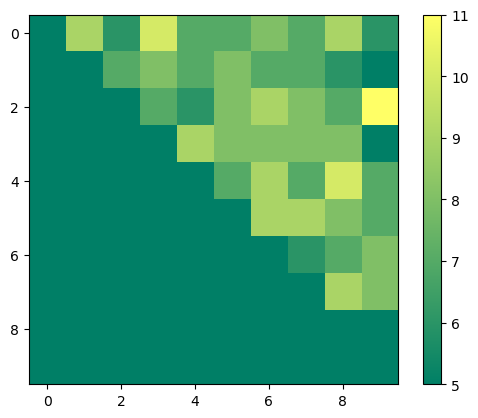

In [33]:
fig, ax = plt.subplots()

minnum = np.min(mat1[mat1!=0])
g = ax.imshow(mat1, cmap='summer', vmin=minnum)
fig.colorbar(g)
plt.show()